In [11]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from IPython import display
from matplotlib import pyplot
import os
import re
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [12]:
data = pd.read_csv('./AAPL.csv')

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [14]:
data.shape

(2011, 7)

In [15]:
##Summary
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [16]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


# Data Preprocessing

In [17]:
##Making Date as Index
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)

In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [19]:
##Checking Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

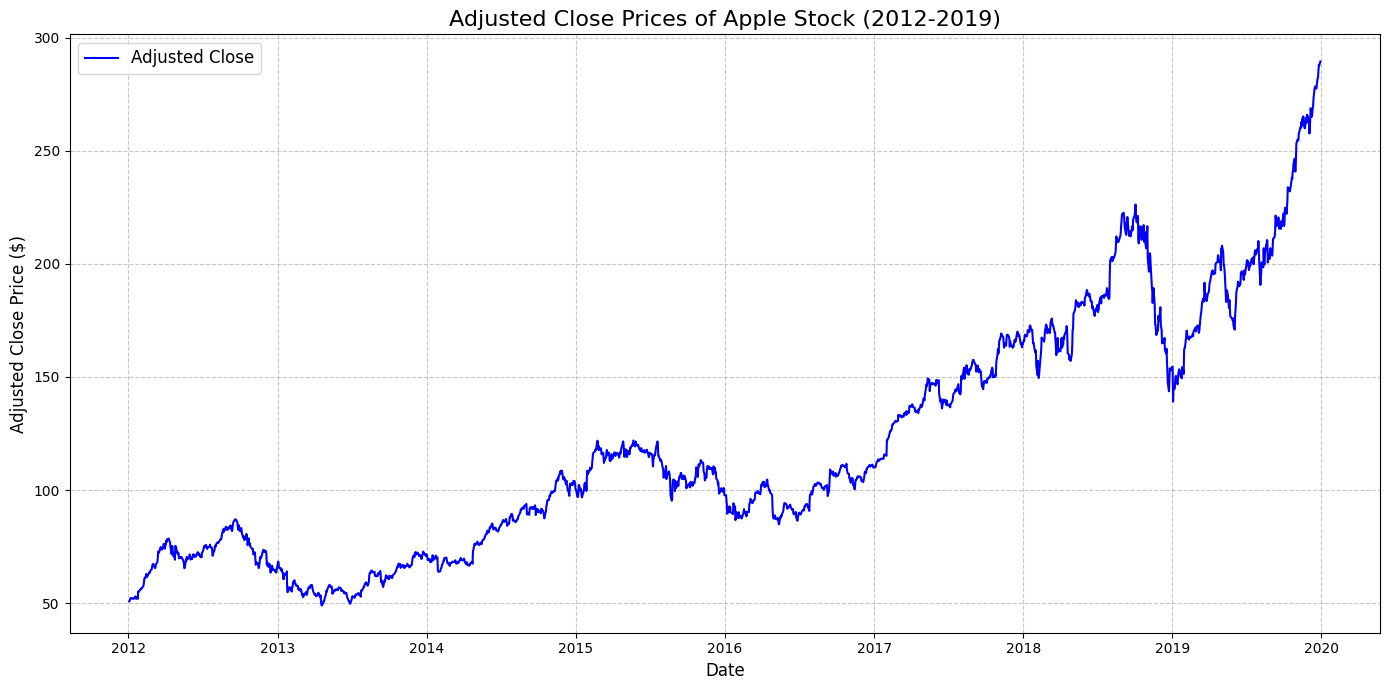

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adjusted Close', color='blue')
plt.title('Adjusted Close Prices of Apple Stock (2012-2019)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

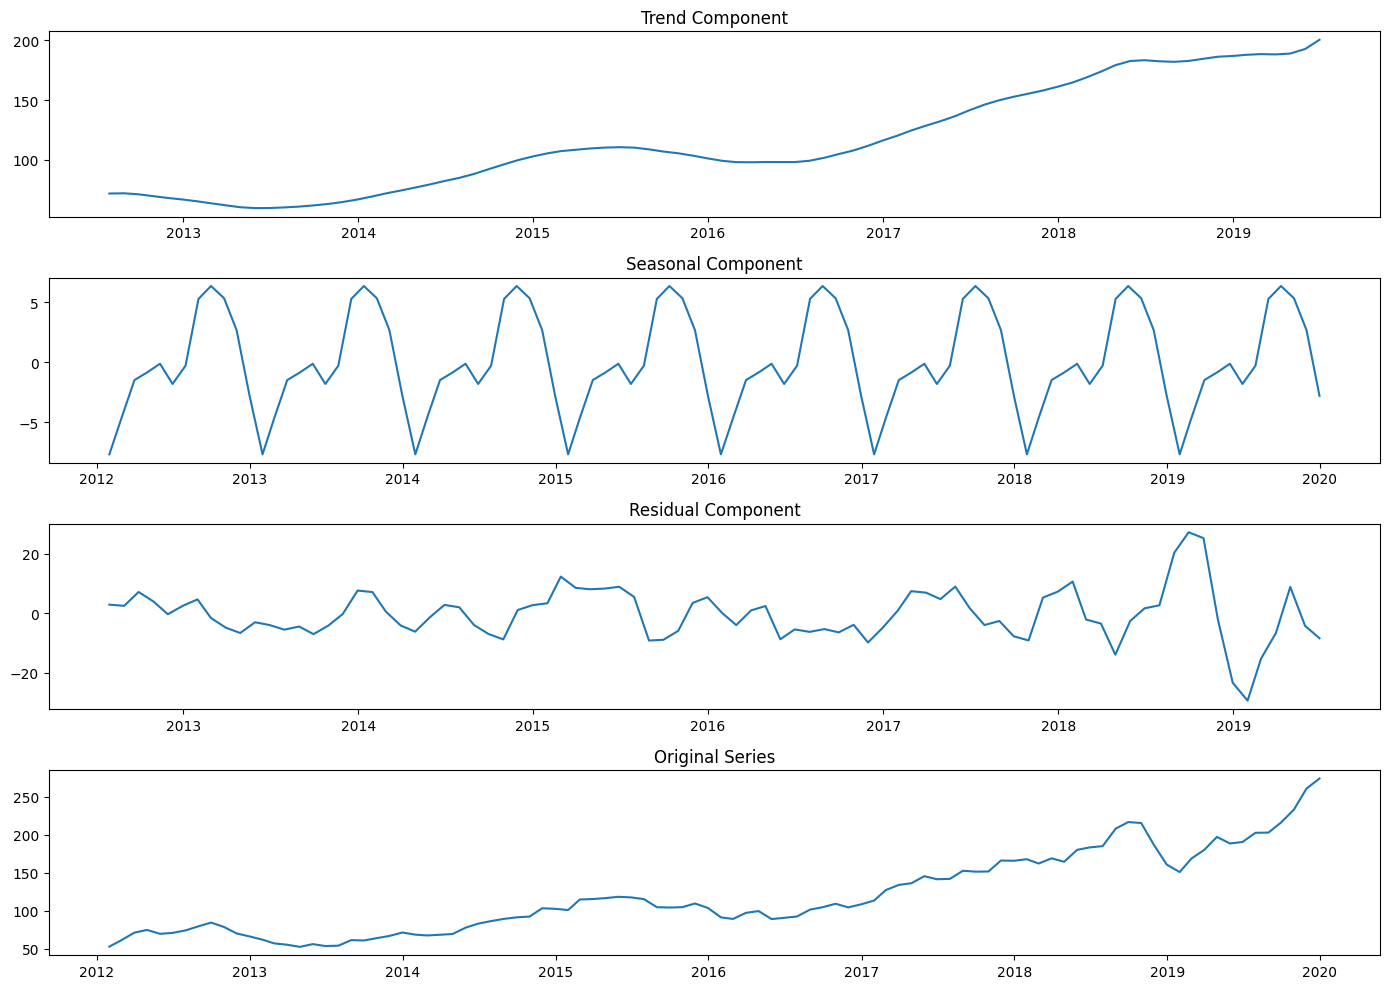

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the monthly datA
Monthly_DATA = data['Adj Close'].resample('M').mean()

# Perform seasonal decomposition
decomposed = seasonal_decompose(Monthly_DATA, model='additive', period=12)

# Plot the decomposed components: Trend, Seasonal, and Residual
plt.figure(figsize=(14, 10))

# Plot Trend
plt.subplot(411)
plt.plot(decomposed.trend)
plt.title('Trend Component')

# Plot Seasonal
plt.subplot(412)
plt.plot(decomposed.seasonal)
plt.title('Seasonal Component')

# Plot Residuals
plt.subplot(413)
plt.plot(decomposed.resid)
plt.title('Residual Component')

# Plot Original Series
plt.subplot(414)
plt.plot(Monthly_DATA)
plt.title('Original Series')

plt.tight_layout()
plt.show()

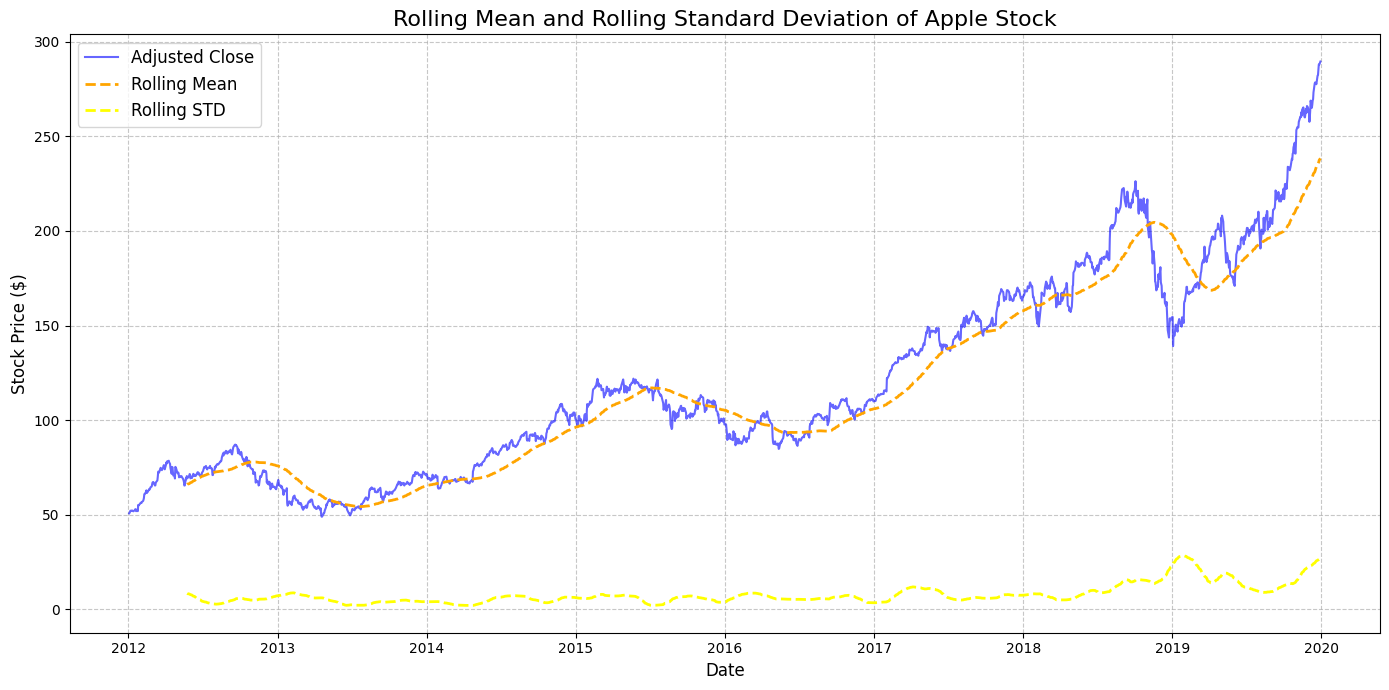

In [ ]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = data['Adj Close'].rolling(window=100).mean()
rolling_std = data['Adj Close'].rolling(window=100).std()

plt.figure(figsize=(14, 7))

# Plot the Adjusted Close price
plt.plot(data['Adj Close'], label='Adjusted Close', color='blue', alpha=0.6)

# Plot the rolling mean
plt.plot(rolling_mean, label='Rolling Mean', color='orange', linestyle='--', linewidth=2)

# Plot the rolling standard deviation
plt.plot(rolling_std, label='Rolling STD', color='yellow', linestyle='--', linewidth=2)

plt.title('Rolling Mean and Rolling Standard Deviation of Apple Stock', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

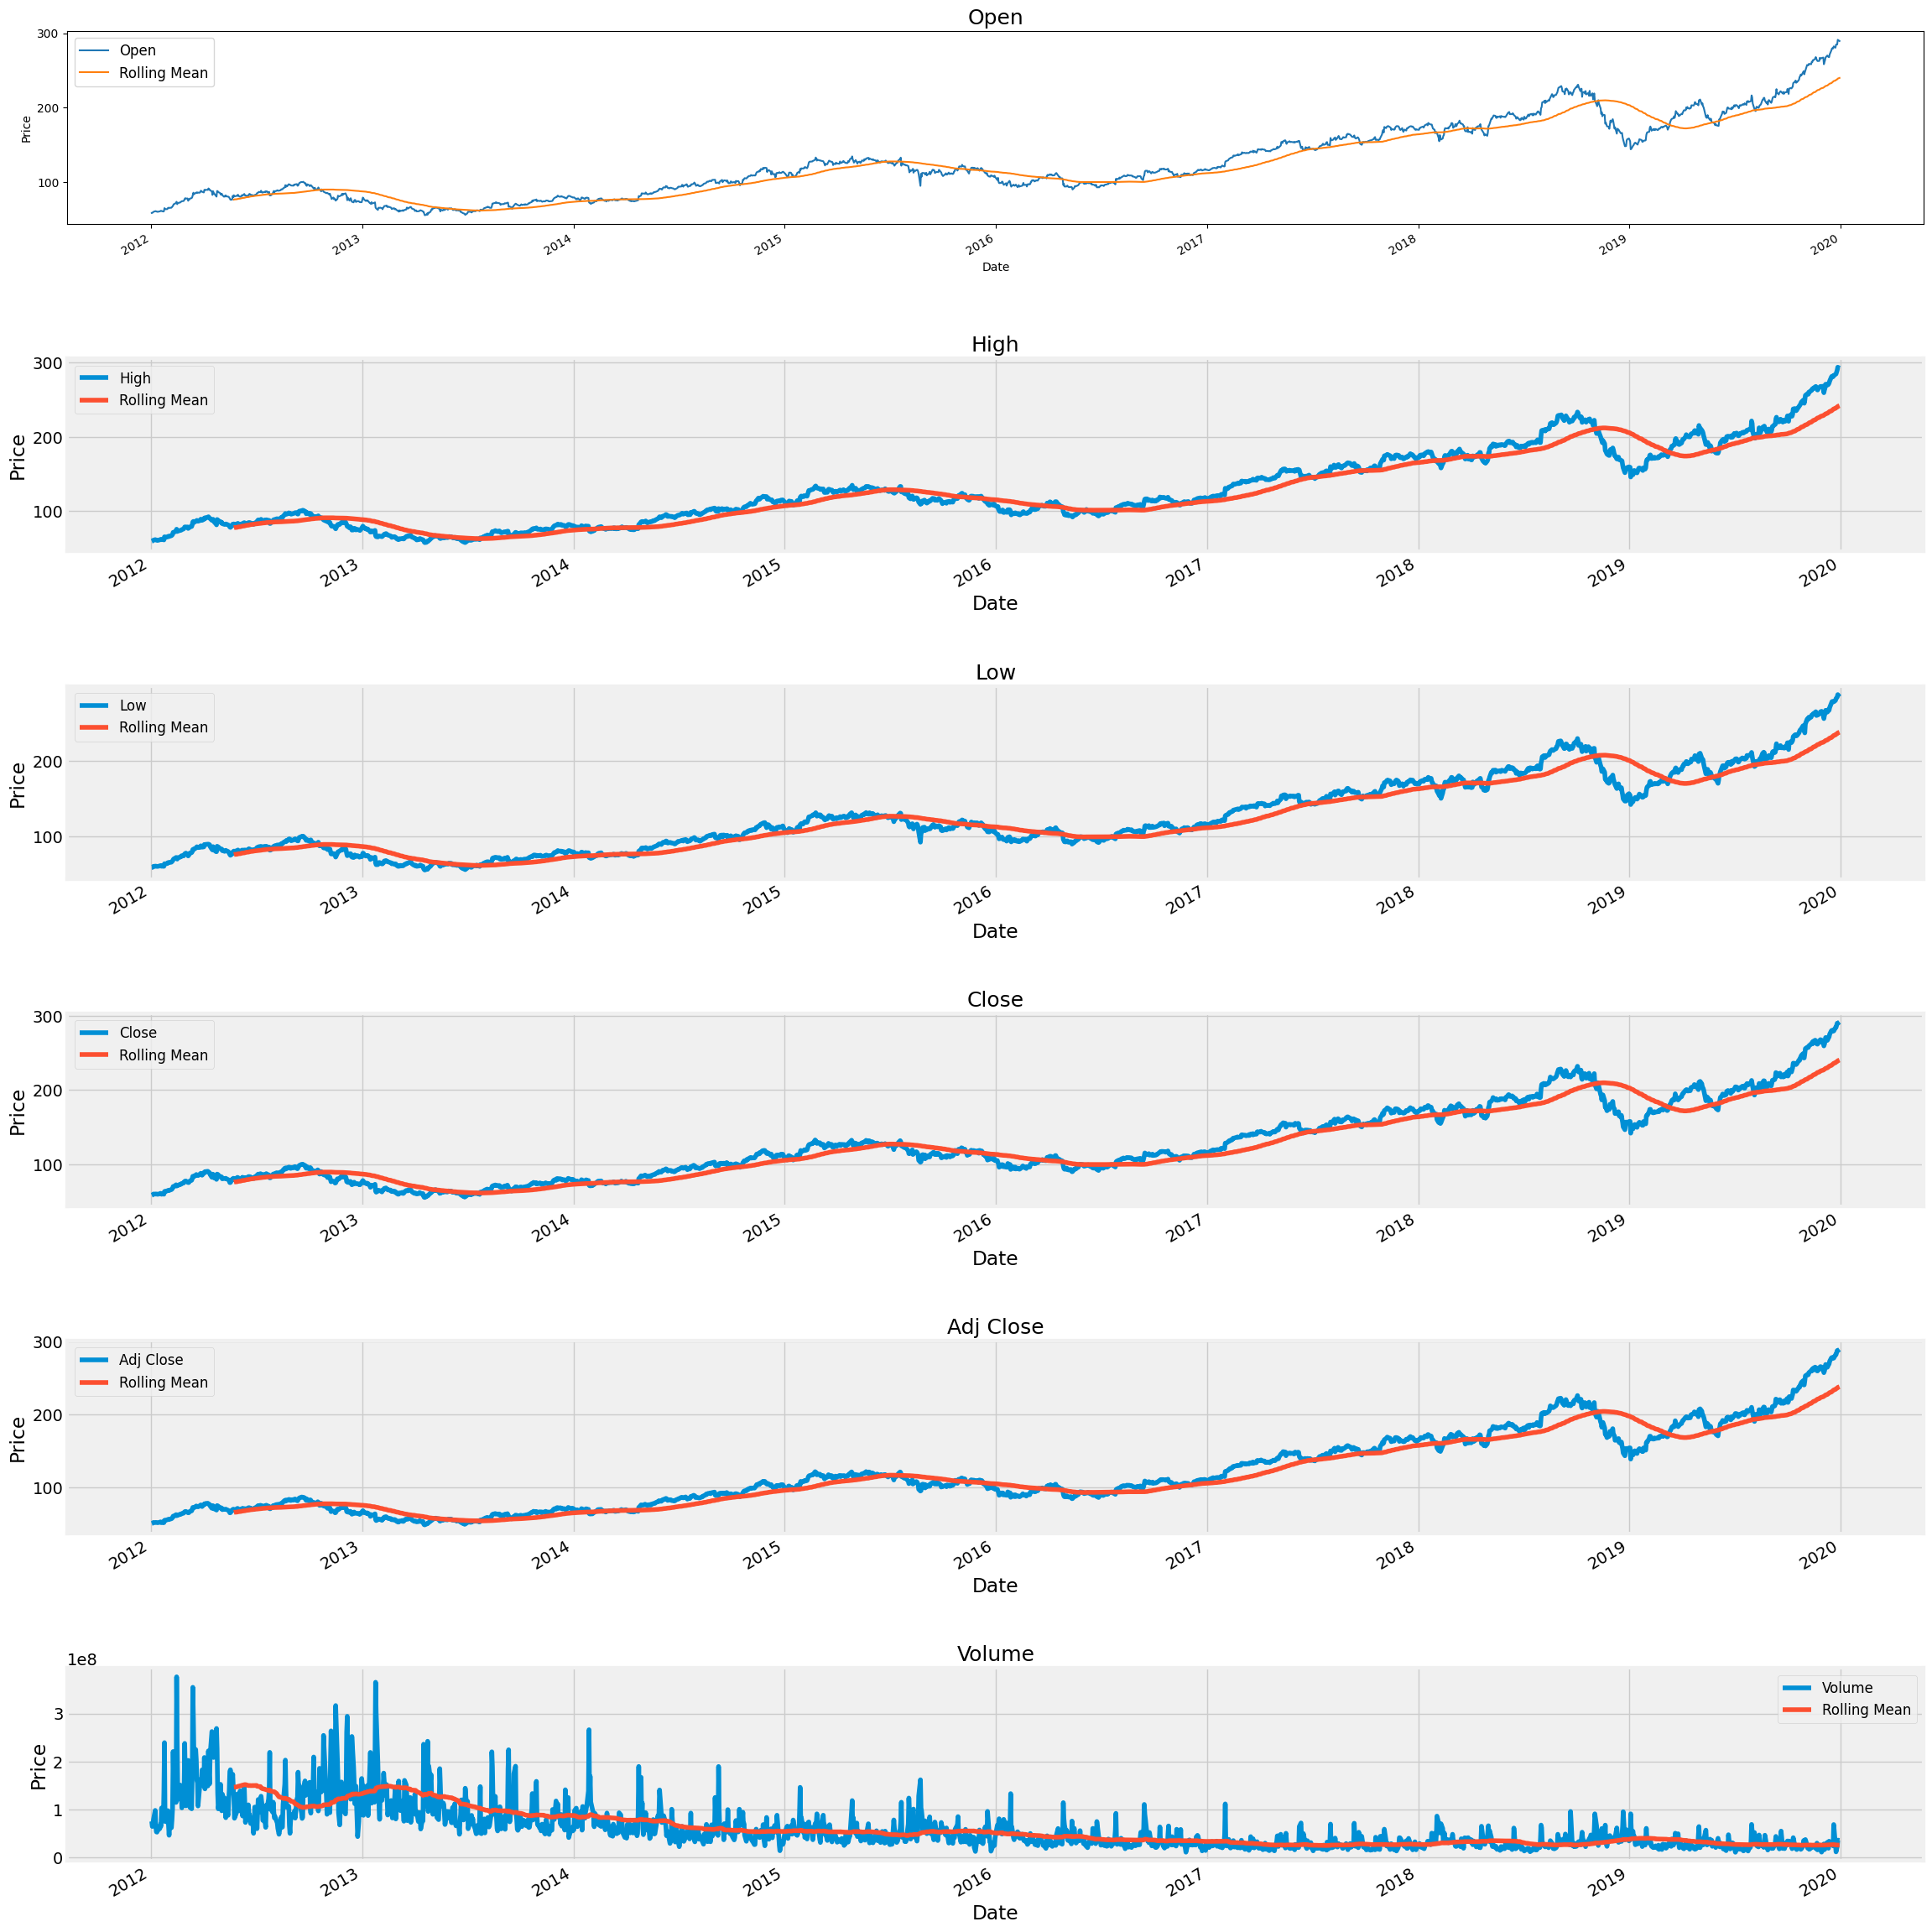

In [9]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

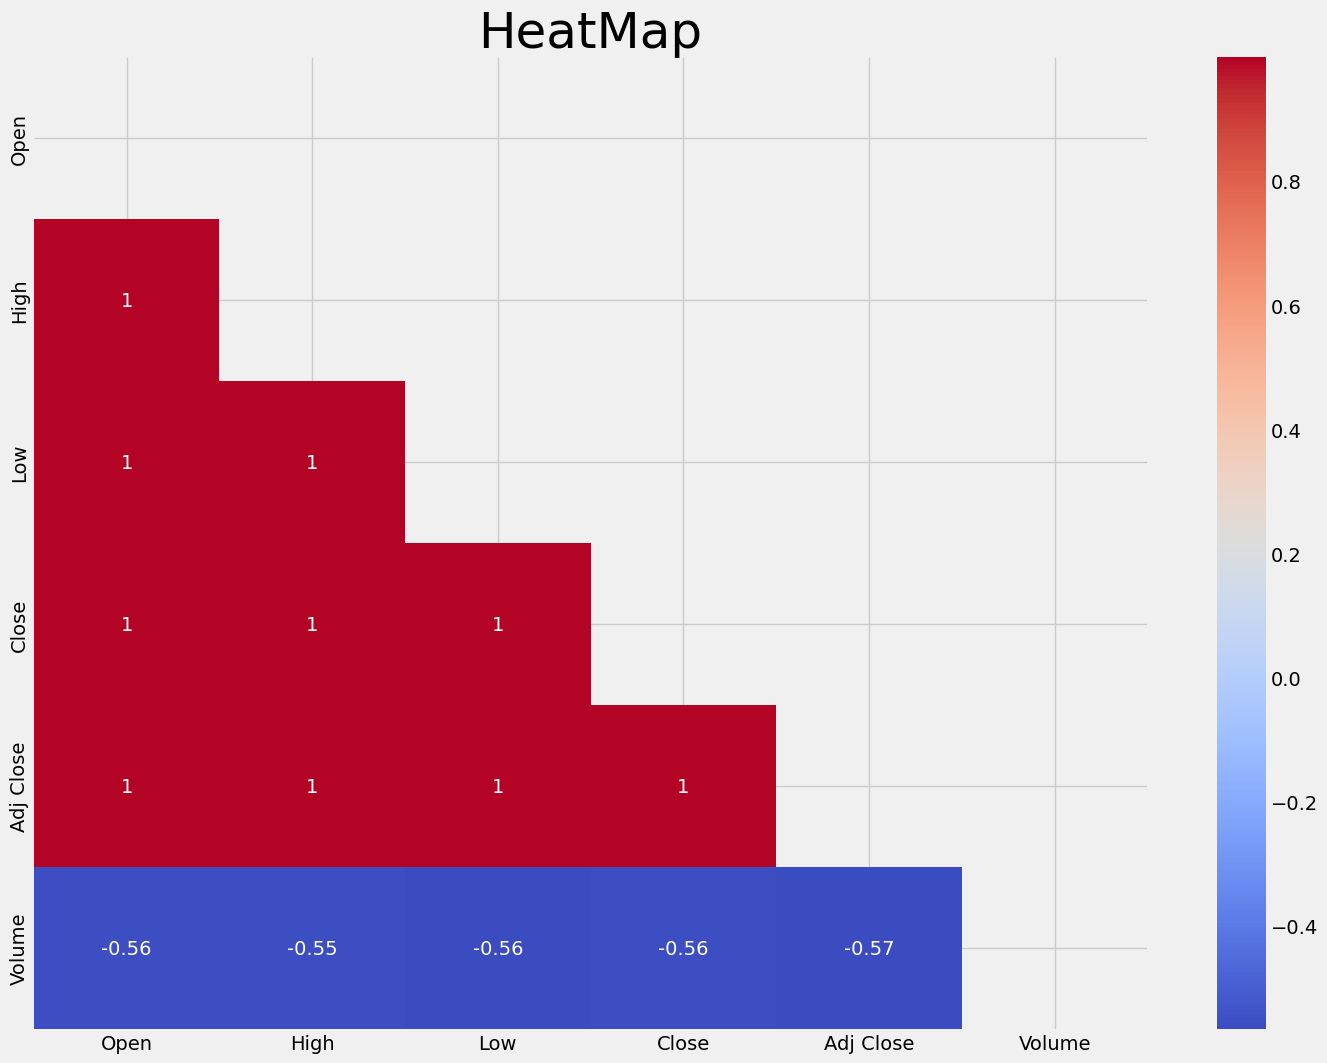

In [10]:
##HeatMap
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [11]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


In [12]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,NaN,50.765709
2012-01-04,NaN,51.038536
2012-01-05,NaN,51.605175
2012-01-06,NaN,52.144630
2012-01-09,NaN,52.061932
...,...,...
2019-12-23,NaN,282.054138
2019-12-24,NaN,282.322266
2019-12-26,NaN,287.923645


In [13]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


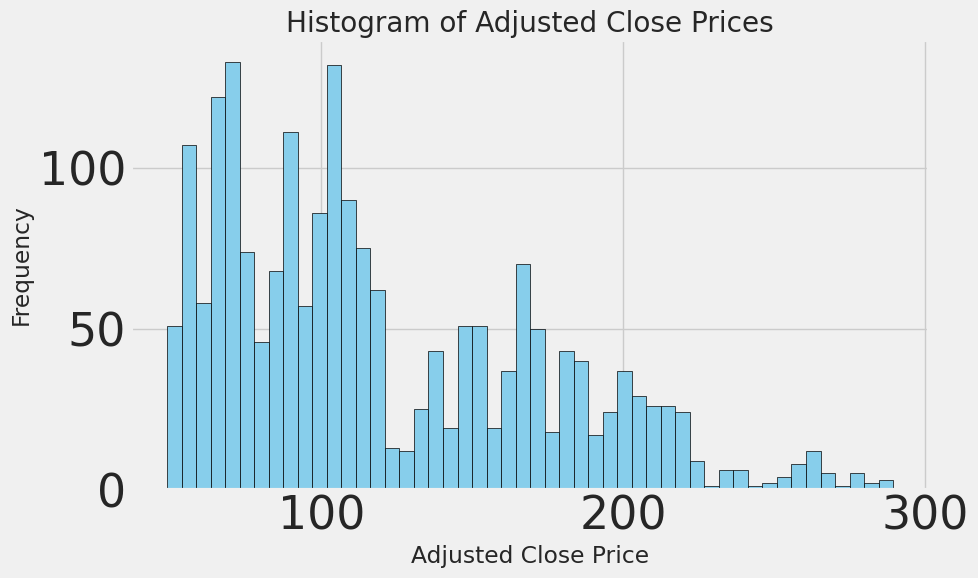

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AAPL.csv')

# Plot histogram for 'Adj Close' prices
plt.figure(figsize=(10, 6))
plt.hist(df['Adj Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


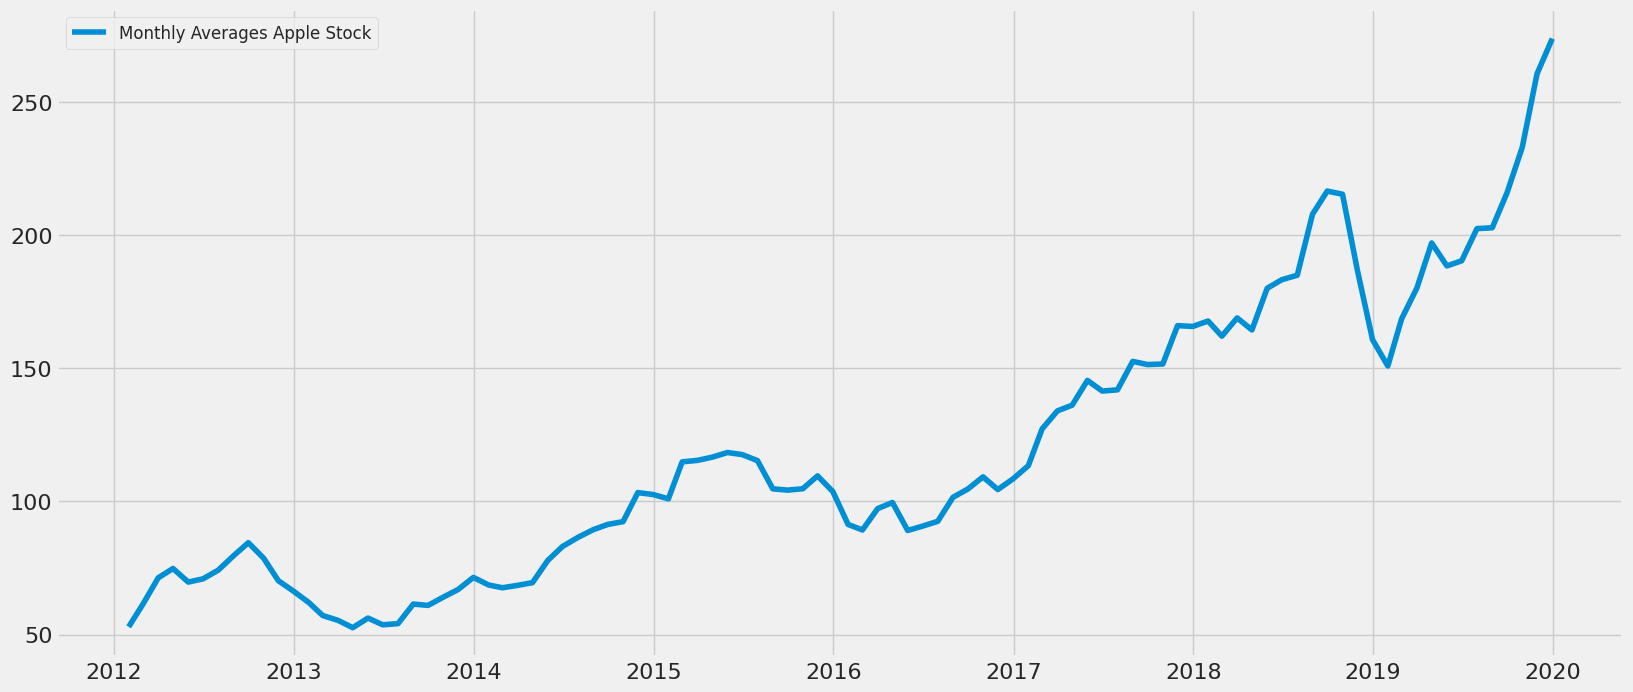

In [15]:
##Monthly Stock Price
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

In [16]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1
2012-02-29,61.424381,2012,February,Wednesday,1
2012-03-31,71.292448,2012,March,Saturday,1
2012-04-30,74.810151,2012,April,Monday,2
2012-05-31,69.708045,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3
2019-09-30,215.853332,2019,September,Monday,3
2019-10-31,232.974974,2019,October,Thursday,4


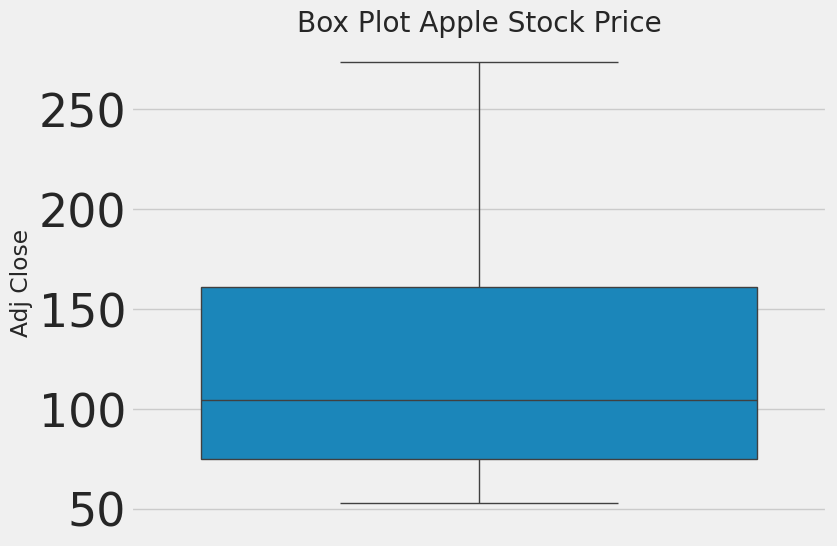

In [17]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

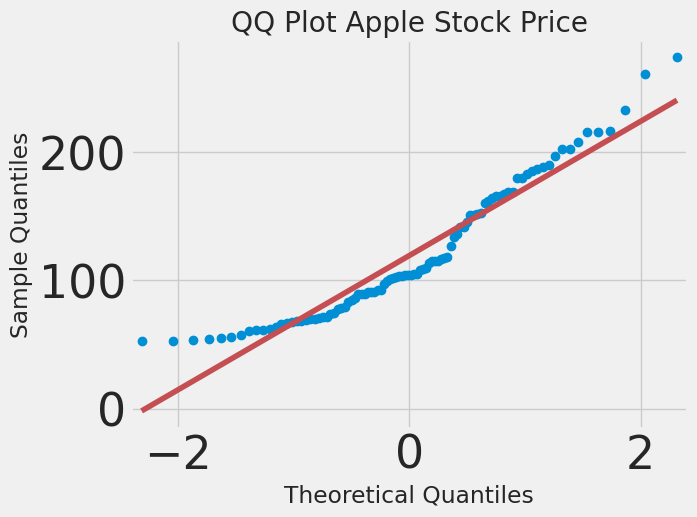

In [18]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

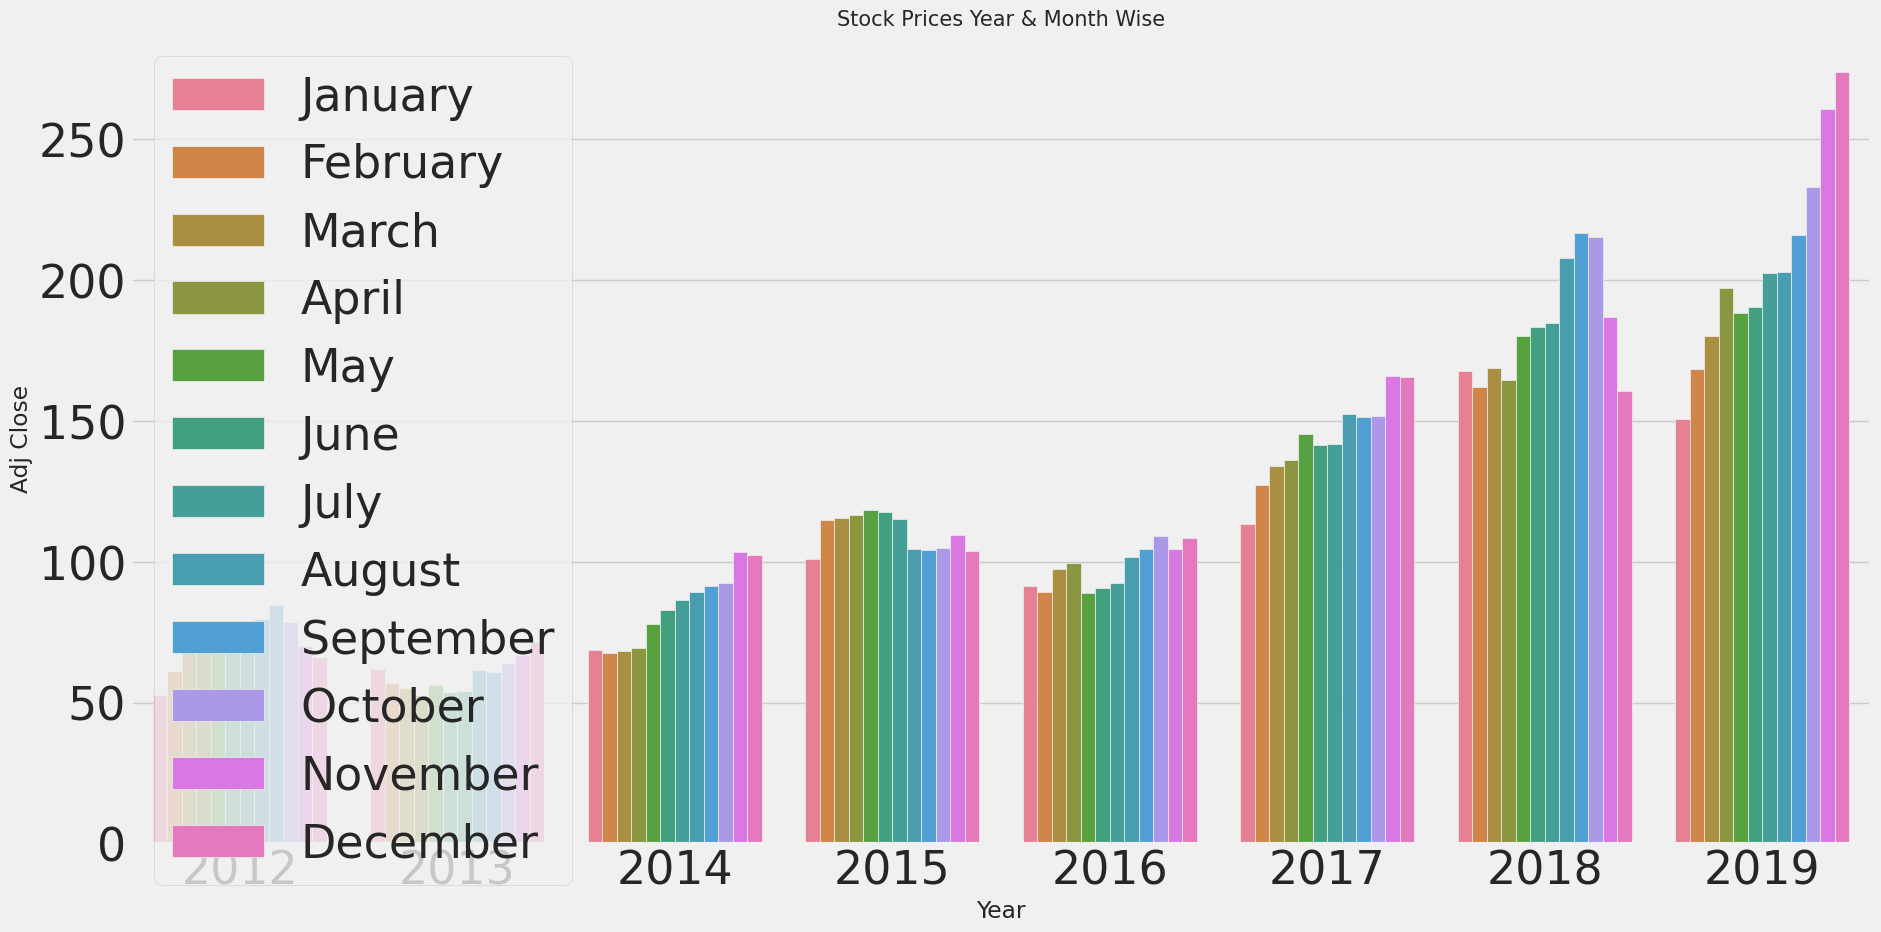

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("deep", 5)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

<Figure size 2000x1600 with 0 Axes>

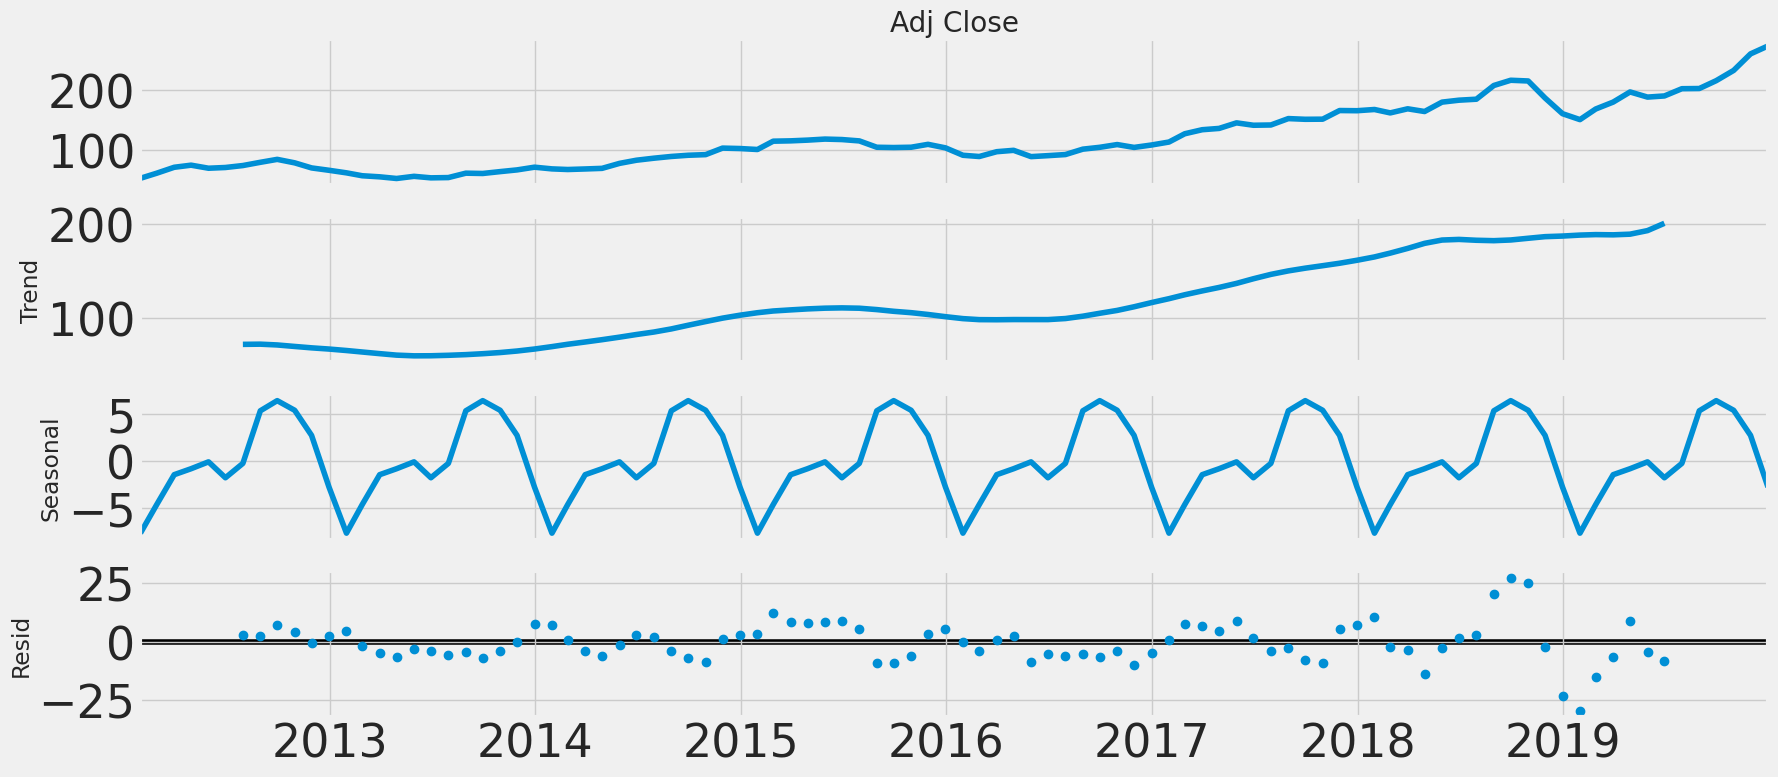

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20, 16))

decomposed_series = sd(monthly_data['Adj Close'], model='additive', period=12)
decomposed_series.plot()
plt.show()


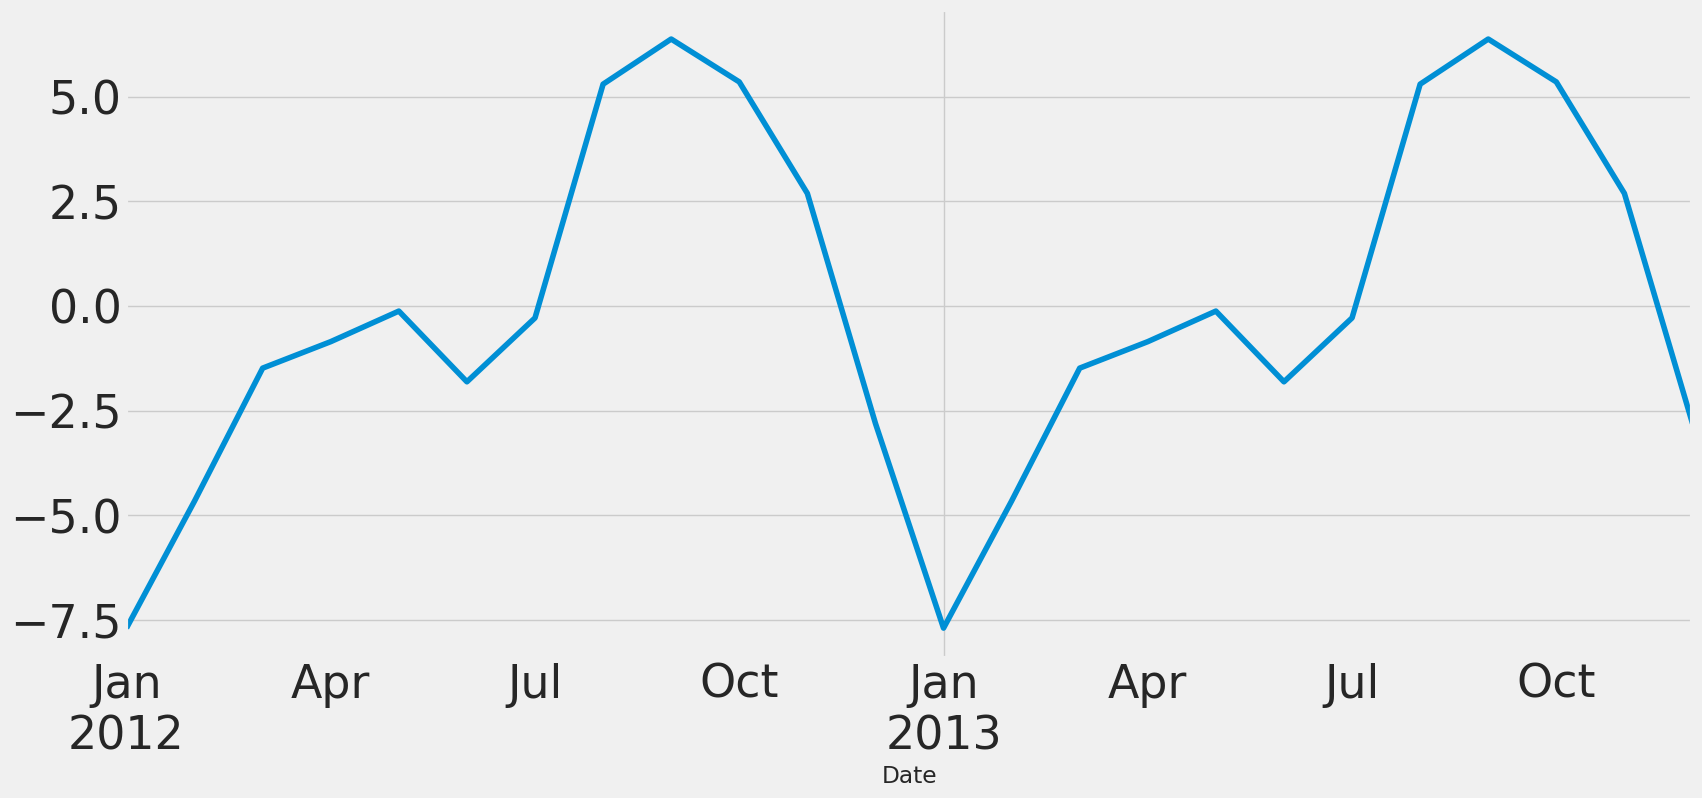

<Figure size 800x800 with 0 Axes>

In [21]:
#Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

->Trend : Overall an Upward Trend

-> Seasonality :There appears to be seasonality,AAPL has rallied during the Holiday season as expected. Since Holiday period has good sales for Apple Over the Years.


In [33]:
from statsmodels.tsa.stattools import adfuller

# ADF Test Function
def ad_fuller_func(X):
    result_ad_fuller = adfuller(X.dropna())
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value: %f' % result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))
    if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
        print('Reject Null Hypothesis(Ho) - Time Series is Stationary')
    else:
        print('Failed to Reject Ho - Time Series is Non-Stationary')
    print('-----------------------------------------------------')

# Apply ADF test to multiple columns
columns_to_test = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in columns_to_test:
    print(f"\nADF Test for: {col}")
    ad_fuller_func(data[col])



ADF Test for: Open
ADF Statistic: 1.060305
p-value: 0.994863
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary
-----------------------------------------------------

ADF Test for: High
ADF Statistic: 1.647002
p-value: 0.997992
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary
-----------------------------------------------------

ADF Test for: Low
ADF Statistic: 1.310260
p-value: 0.996666
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary
-----------------------------------------------------

ADF Test for: Close
ADF Statistic: 1.219370
p-value: 0.996117
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary
-----------------------------------------------------

ADF Test for: Adj Close
ADF Statistic: 1.453800
p-value: 0.997345
Critical Values:
	1%: -3.434
	5%: -2.863
	10%

Text(0.5, 0, 'Lags')

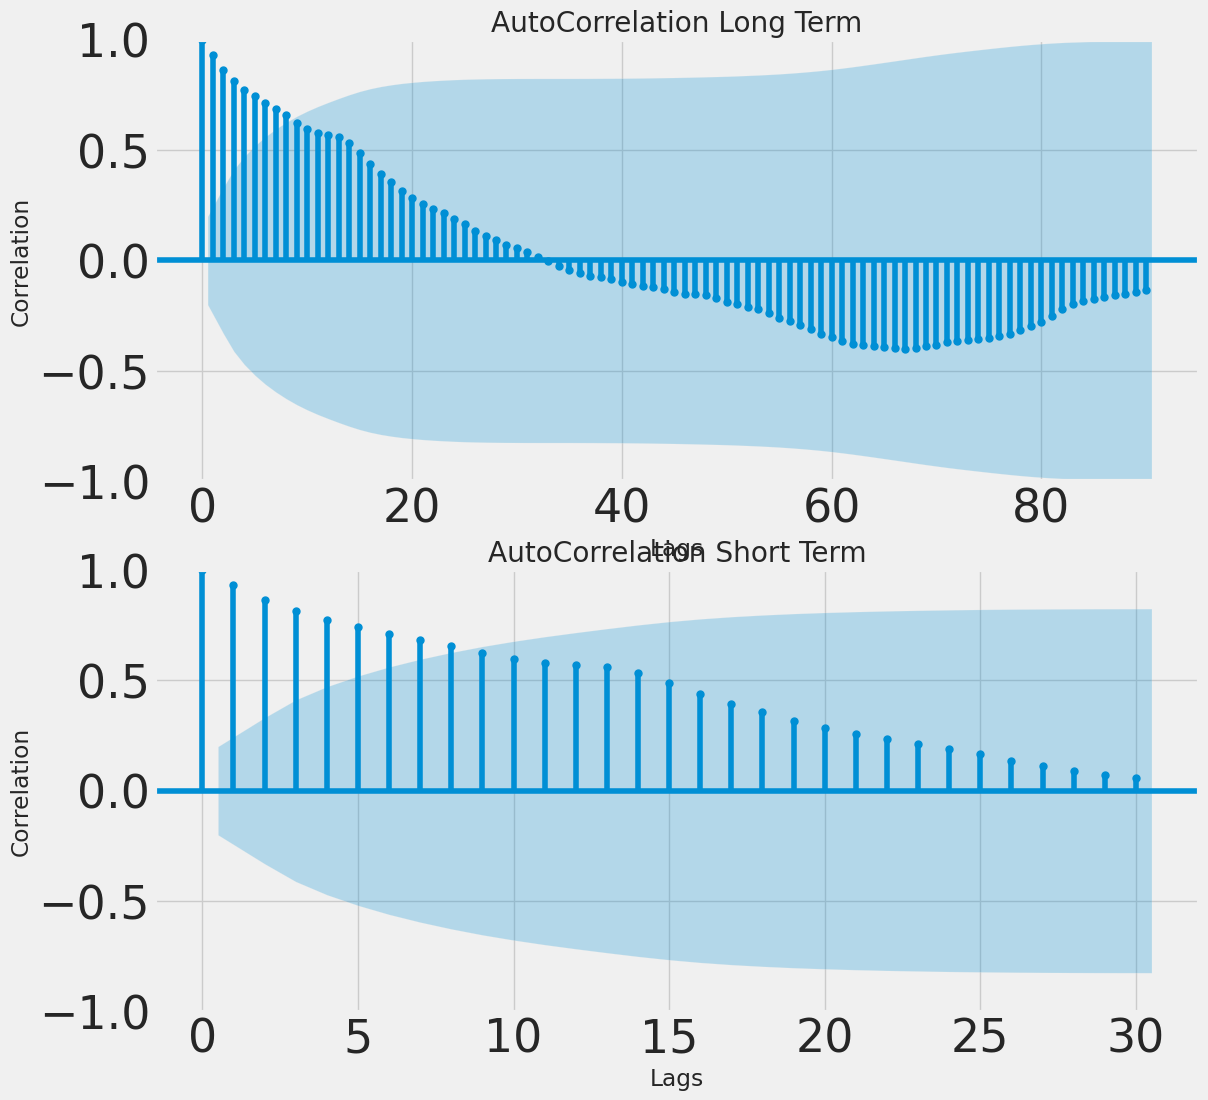

In [24]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

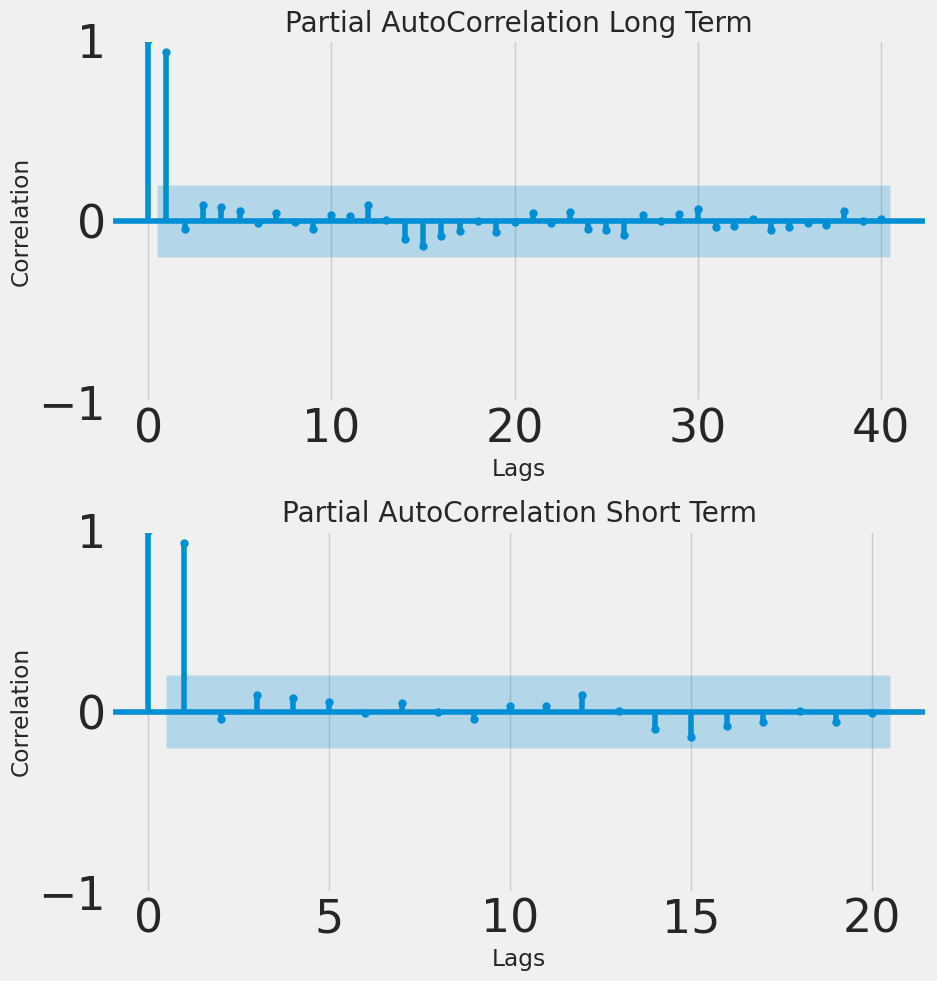

In [25]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Adjust lags to be less than half the sample size
pacf = plot_pacf(monthly_data['Adj Close'], lags=40, ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')

pacf = plot_pacf(monthly_data['Adj Close'], lags=20, ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout(pad=1)


In [26]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

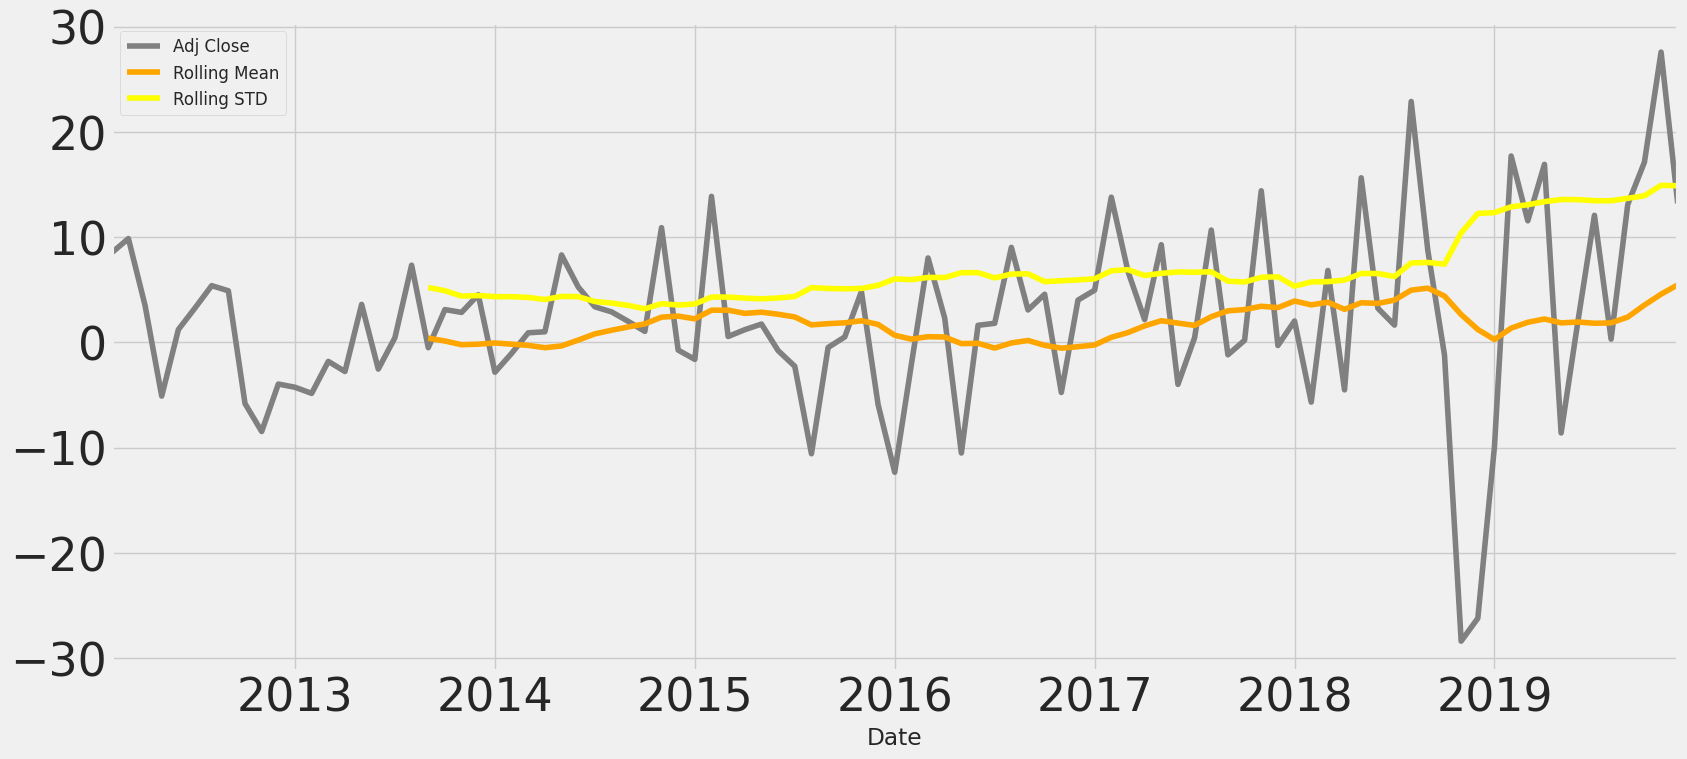

In [27]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [28]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
ts_data = data['Adj Close'].dropna()





# ---------------------
# AutoRegressive (AR) model (ARIMA(p,0,0))
ar_model = ARIMA(ts_data, order=(2, 0, 0)).fit()
print("AR Model Summary:\n", ar_model.summary())
ar_forecast = ar_model.forecast(steps=5)
print("\nAR Forecast:\n", ar_forecast)

# ---------------------
# Moving Average (MA) model (ARIMA(0,0,q))
ma_model = ARIMA(ts_data, order=(0, 0, 2)).fit()
print("\nMA Model Summary:\n", ma_model.summary())
ma_forecast = ma_model.forecast(steps=5)
print("\nMA Forecast:\n", ma_forecast)

# ---------------------
# AutoRegressive Moving Average (ARMA) model (ARIMA(p,0,q))
arma_model = ARIMA(ts_data, order=(2, 0, 2)).fit()
print("\nARMA Model Summary:\n", arma_model.summary())


# AIC = -2*Log-Likelihood + 2*k
# BIC = -2*Log-Likelihood + k*log(n)



AR Model Summary:
                                SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2011
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -4283.938
Date:                Sun, 20 Apr 2025   AIC                           8575.876
Time:                        19:01:59   BIC                           8598.301
Sample:                             0   HQIC                          8584.108
                               - 2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.3466    290.993      0.414      0.679    -449.990     690.683
ar.L1          1.0136      0.014     70.149      0.000       0.985       1.042
ar.L2         -0.0138      0.015 

Suggested differencing order (d): 1
New best: ARIMA(1, 1, 1) | RMSE: 4.91

Final model: ARIMA(1, 1, 1)


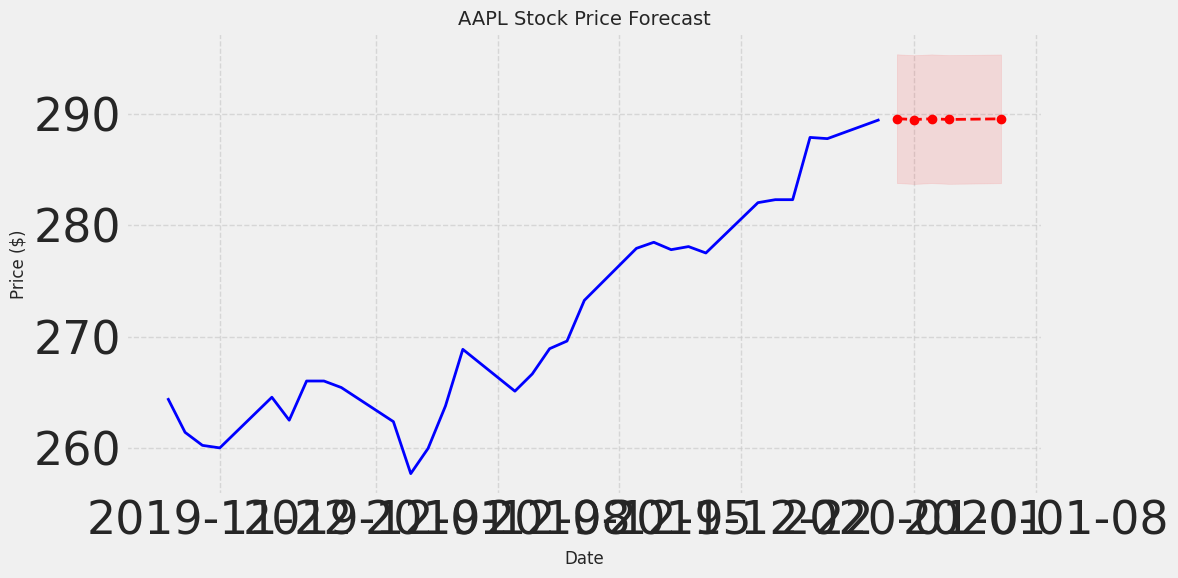


5-Day Price Forecast:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load and prepare data
data = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
ts_data = data['Adj Close'].asfreq('B').ffill()  # Ensure business day frequency

# Stationarity check and automatic differencing
def make_stationary(series):
    d = 0
    while adfuller(series.dropna())[1] > 0.05 and d < 2:  # Max 2 diffs
        series = series.diff().dropna()
        d += 1
    return series, d

stationary_data, d = make_stationary(ts_data)
print(f"Suggested differencing order (d): {d}")

# Parameter grid search (avoids flat forecasts)
def find_best_arima(series, d):
    best_order = (1, d, 1)  # Default fallback
    best_rmse = float('inf')

    for p in [1, 2, 3]:  # Test AR terms
        for q in [1, 2, 3]:  # Test MA terms
            try:
                # Train-test split
                train, test = series[:-5], series[-5:]

                # Fit model
                model = ARIMA(train, order=(p, d, q)).fit()

                # Forecast and validate
                forecast = model.forecast(steps=5)
                rmse = np.sqrt(mean_squared_error(test, forecast))

                # Update best model
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
                    print(f"New best: ARIMA{best_order} | RMSE: {rmse:.2f}")

            except:
                continue

    return best_order

best_order = find_best_arima(ts_data, d)
print(f"\nFinal model: ARIMA{best_order}")

# Fit final model
final_model = ARIMA(ts_data, order=best_order).fit()

# Generate dynamic forecast (avoids flat predictions)
forecast = final_model.forecast(steps=5, dynamic=True)
forecast_dates = pd.date_range(
    start=ts_data.index[-1] + pd.Timedelta(days=1),
    periods=5,
    freq='B'
)
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot with improved styling
plt.figure(figsize=(12, 6))
plt.plot(ts_data[-30:], label='Historical Prices', linewidth=2, color='blue')
plt.plot(forecast_series,
         label=f'ARIMA{best_order} Forecast',
         color='red',
         marker='o',
         linestyle='--',
         linewidth=2)
plt.fill_between(
    forecast_series.index,
    forecast_series * 0.98,
    forecast_series * 1.02,
    color='red',
    alpha=0.1,
    label='±2% Confidence'
)
plt.title('AAPL Stock Price Forecast', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print formatted forecast
print("\n5-Day Price Forecast:")
print(forecast_series.to_frame().style.format("${:.2f}"))

# **Modelling Seasonal ARIMA**

In [31]:
modelling_series = monthly_data['Adj Close']
modelling_series

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


In [ ]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:660.0393312743108
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:489.7460184417552
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:353.496587435831
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.6767009067285
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:878.7421191379622
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:190.03613003688085
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:329.453039324708
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:199.04766684846217
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:77.50850683094
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:416.924626814638
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:390.86362421371723
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:291.60796504037114
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:313.3476356777958
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:981.2045020559699
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:191.57863156063468
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:216.19853387952406
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:199.62020585361967
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:72.11098828037004
ARIMA(0, 

# Forecasting Seasonal ARIMA

In [ ]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2012-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

In [ ]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

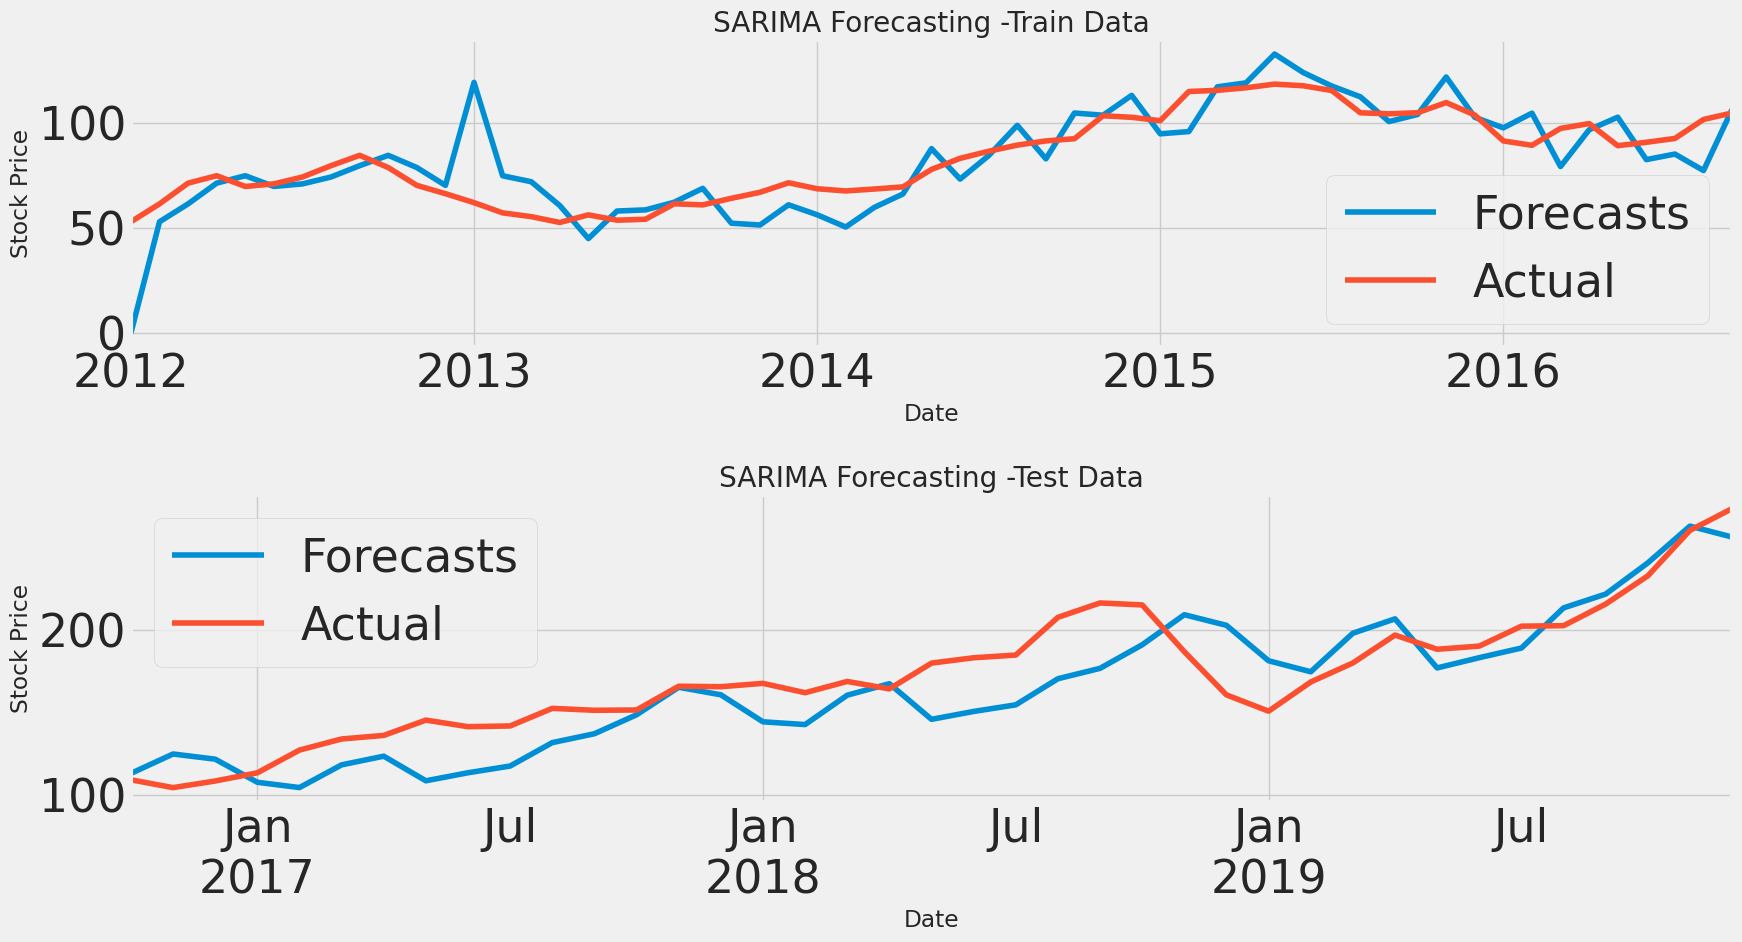

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))


Result Metrics for SARIMA-Train Data
R2 Score :  0.491
Mean Squared Error :  199.567
Mean Absolute Error :  9.797
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.704
Mean Squared Error :  441.12
Mean Absolute Error :  17.557
None


**Seasonal ARIMA-Verdict**

The mean value is close to zero but it suggests that there is some bias in the model.
Overall the model has performed good for a problem like Stock Price Prediction being a difficult problem .



Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - loss: 0.0098 - val_loss: 0.0015
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 5.8662e-04 - val_loss: 0.0010
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 4.8101e-04 - val_loss: 8.7890e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 5.7430e-04 - val_loss: 0.0024
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 5.3398e-04 - val_loss: 8.1649e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 4.6086e-04 - val_loss: 0.0012
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 5.2271e-04 - val_loss: 9.3602e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 5.7471e-04 - val_loss: 6.9749e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 5.0205e-04 - val_loss: 7.7114e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 4.7792e-04 - val_loss: 6.3980e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
RMSE: 6.085807394806878


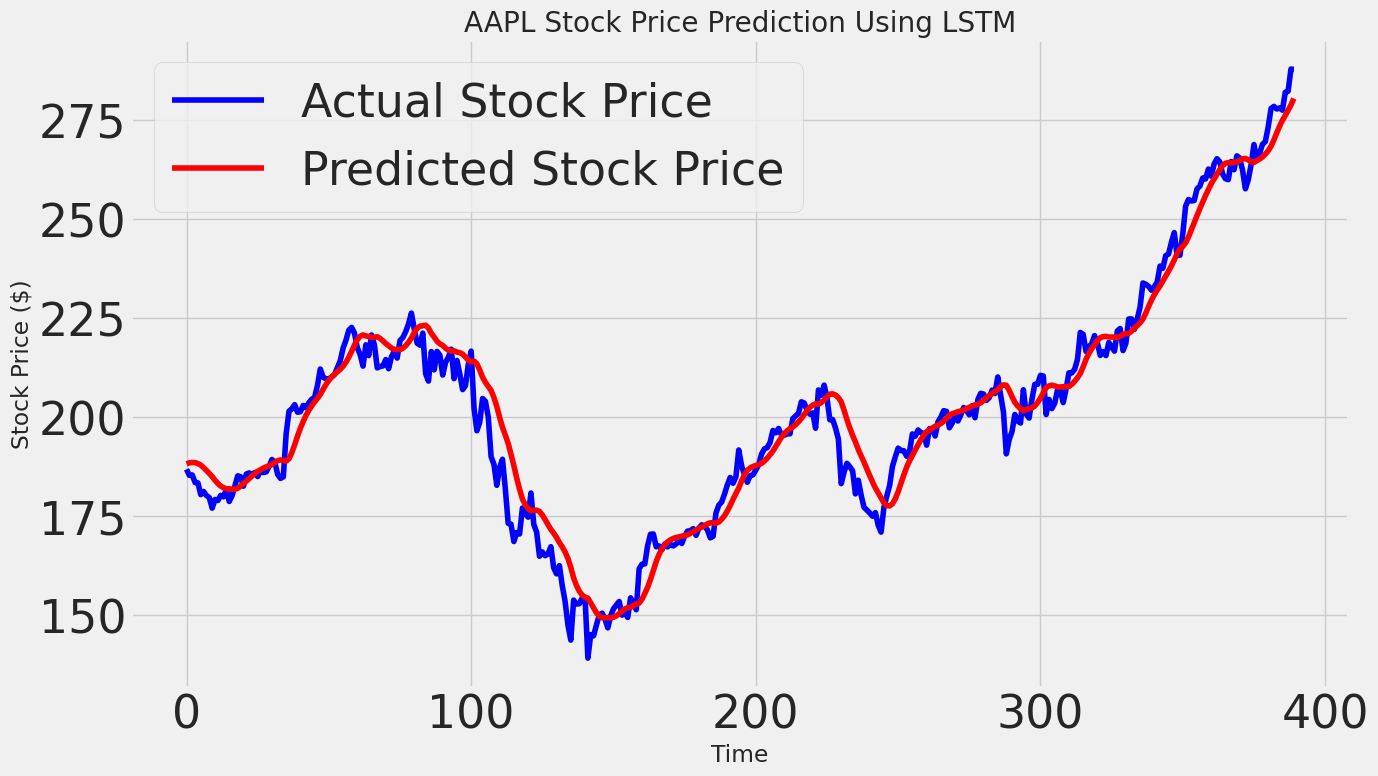

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Load data
data = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')

# Use 'Adj Close' for LSTM model
data = data[['Adj Close']]

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM (convert to supervised learning format)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be compatible with LSTM (samples, time_step, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_stock_price))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('AAPL Stock Price Prediction Using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()
